In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # also for plotting

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/divvy-trips-2019/Divvy_Trips_2019_Q2.csv
/kaggle/input/divvy-trips-2019/Divvy_Trips_2019_Q3.csv
/kaggle/input/divvy-trips-2019/Divvy_Trips_2019_Q4.csv
/kaggle/input/divvy-trips-2019/Divvy_Trips_2019_Q1.csv


In [8]:
# Criar um dataframe para cada planilha.
file_path_q1 = '/kaggle/input/divvy-trips-2019/Divvy_Trips_2019_Q1.csv'
file_path_q2 = '/kaggle/input/divvy-trips-2019/Divvy_Trips_2019_Q2.csv'
file_path_q3 = '/kaggle/input/divvy-trips-2019/Divvy_Trips_2019_Q3.csv'
file_path_q4 = '/kaggle/input/divvy-trips-2019/Divvy_Trips_2019_Q4.csv'

# Carregar os dados.
data_q1 = pd.read_csv(file_path_q1)
data_q2 = pd.read_csv(file_path_q2)
data_q3 = pd.read_csv(file_path_q3)
data_q4 = pd.read_csv(file_path_q4)

# Ver se tudo funcionou (づ｡◕‿‿◕｡)づ	
print('Everything worked yeay')

Everything worked yeay


### Processo de Limpeza de Dados.

Os arquivos estão divididos em trimestres, vou trabalhar cada trimestre individualmente, começando pelo Q1. Meu objetivo aqui é:

- Verificar entradas duplicadas.
- Procurar e lidar com valores ausentes.
- Identificar valores discrepantes nas colunas.
- Verificar e, se necessário, converter dados para valores padronizados (inteiros, strings, datas).
- Consolidar o conjunto de dados e padronizá-lo.

Realize o mesmo processo para os quatro conjuntos de dados.


In [10]:
# Visualizar as planilhas.
data_q1.head()

trip_id           start_time             end_time  bikeid tripduration  \
0  21742443  2019-01-01 00:04:37  2019-01-01 00:11:07    2167        390.0   
1  21742444  2019-01-01 00:08:13  2019-01-01 00:15:34    4386        441.0   
2  21742445  2019-01-01 00:13:23  2019-01-01 00:27:12    1524        829.0   
3  21742446  2019-01-01 00:13:45  2019-01-01 00:43:28     252      1,783.0   
4  21742447  2019-01-01 00:14:52  2019-01-01 00:20:56    1170        364.0   

   from_station_id                    from_station_name  to_station_id  \
0              199               Wabash Ave & Grand Ave             84   
1               44               State St & Randolph St            624   
2               15                 Racine Ave & 18th St            644   
3              123       California Ave & Milwaukee Ave            176   
4              173  Mies van der Rohe Way & Chicago Ave             35   

                  to_station_name    usertype  gender  birthyear  
0       Milwaukee Ave & Grand Ave  Subscriber    Male     1989.0  
1  Dearborn St & Van Buren St (*)  Subscriber  Female     1990.0  
2   Western Ave & Fillmore St (*)  Subscriber  Female     1994.0  
3               Clark St & Elm St  Subscriber    Male     1993.0  
4         Streeter Dr & Grand Ave  Subscriber    Male     1994.0

In [38]:
# As colunas do Q2 estão nomeadas de forma diferente.
data_q2.head()

01 - Rental Details Rental ID 01 - Rental Details Local Start Time  \
0                       22178529                  2019-04-01 00:02:22   
1                       22178530                  2019-04-01 00:03:02   
2                       22178531                  2019-04-01 00:11:07   
3                       22178532                  2019-04-01 00:13:01   
4                       22178533                  2019-04-01 00:19:26   

  01 - Rental Details Local End Time  01 - Rental Details Bike ID  \
0                2019-04-01 00:09:48                         6251   
1                2019-04-01 00:20:30                         6226   
2                2019-04-01 00:15:19                         5649   
3                2019-04-01 00:18:58                         4151   
4                2019-04-01 00:36:13                         3270   

  01 - Rental Details Duration In Seconds Uncapped  \
0                                            446.0   
1                                          1,048.0   
2                                            252.0   
3                                            357.0   
4                                          1,007.0   

   03 - Rental Start Station ID 03 - Rental Start Station Name  \
0                            81             Daley Center Plaza   
1                           317            Wood St & Taylor St   
2                           283      LaSalle St & Jackson Blvd   
3                            26       McClurg Ct & Illinois St   
4                           202           Halsted St & 18th St   

   02 - Rental End Station ID 02 - Rental End Station Name   User Type  \
0                          56    Desplaines St & Kinzie St  Subscriber   
1                          59    Wabash Ave & Roosevelt Rd  Subscriber   
2                         174        Canal St & Madison St  Subscriber   
3                         133     Kingsbury St & Kinzie St  Subscriber   
4                         129    Blue Island Ave & 18th St  Subscriber   

  Member Gender  05 - Member Details Member Birthday Year  
0          Male                                    1975.0  
1        Female                                    1984.0  
2          Male                                    1990.0  
3          Male                                    1993.0  
4          Male                                    1992.0

In [39]:
data_q3.head()

trip_id           start_time             end_time  bikeid tripduration  \
0  23479388  2019-07-01 00:00:27  2019-07-01 00:20:41    3591      1,214.0   
1  23479389  2019-07-01 00:01:16  2019-07-01 00:18:44    5353      1,048.0   
2  23479390  2019-07-01 00:01:48  2019-07-01 00:27:42    6180      1,554.0   
3  23479391  2019-07-01 00:02:07  2019-07-01 00:27:10    5540      1,503.0   
4  23479392  2019-07-01 00:02:13  2019-07-01 00:22:26    6014      1,213.0   

   from_station_id              from_station_name  to_station_id  \
0              117       Wilton Ave & Belmont Ave            497   
1              381        Western Ave & Monroe St            203   
2              313  Lakeview Ave & Fullerton Pkwy            144   
3              313  Lakeview Ave & Fullerton Pkwy            144   
4              168         Michigan Ave & 14th St             62   

             to_station_name    usertype gender  birthyear  
0  Kimball Ave & Belmont Ave  Subscriber   Male     1992.0  
1      Western Ave & 21st St    Customer    NaN        NaN  
2  Larrabee St & Webster Ave    Customer    NaN        NaN  
3  Larrabee St & Webster Ave    Customer    NaN        NaN  
4            McCormick Place    Customer    NaN        NaN

In [40]:
data_q4.head()

trip_id           start_time             end_time  bikeid tripduration  \
0  25223640  2019-10-01 00:01:39  2019-10-01 00:17:20    2215        940.0   
1  25223641  2019-10-01 00:02:16  2019-10-01 00:06:34    6328        258.0   
2  25223642  2019-10-01 00:04:32  2019-10-01 00:18:43    3003        850.0   
3  25223643  2019-10-01 00:04:32  2019-10-01 00:43:43    3275      2,350.0   
4  25223644  2019-10-01 00:04:34  2019-10-01 00:35:42    5294      1,867.0   

   from_station_id               from_station_name  to_station_id  \
0               20    Sheffield Ave & Kingsbury St            309   
1               19  Throop (Loomis) St & Taylor St            241   
2               84       Milwaukee Ave & Grand Ave            199   
3              313   Lakeview Ave & Fullerton Pkwy            290   
4              210       Ashland Ave & Division St            382   

               to_station_name    usertype  gender  birthyear  
0    Leavitt St & Armitage Ave  Subscriber    Male     1987.0  
1          Morgan St & Polk St  Subscriber    Male     1998.0  
2       Wabash Ave & Grand Ave  Subscriber  Female     1991.0  
3       Kedzie Ave & Palmer Ct  Subscriber    Male     1990.0  
4  Western Ave & Congress Pkwy  Subscriber    Male     1987.0

In [14]:
# Conferir o tamanho dessa planilha.
num_lines, num_columns = data_q1.shape

# Exibindo o número de linhas e colunas.
print(f'The DataFrame has {num_lines} rows and {num_columns} columns.')


The DataFrame has 365069 rows and 12 columns.


In [12]:
# Confirmar números nulos/vazios.
data_q1.isnull().sum()

trip_id                  0
start_time               0
end_time                 0
bikeid                   0
tripduration             0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
usertype                 0
gender               19711
birthyear            18023
dtype: int64

In [15]:
# Preencher os valores vazios na coluna 'gender' com 'Unknown'.
data_q1['gender'].fillna('unknow', inplace=True)


# Preencher os valores vazios na coluna 'birthyear' com a média.
data_q1['birthyear'].fillna(data_q1['birthyear'].mean(), inplace=True)

In [13]:
# Verificar por duplicatas.
data_q1.duplicated().sum()

0

In [16]:
# Conferir novamente por valores nulos.
data_q1.isnull().sum()

trip_id              0
start_time           0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
dtype: int64

In [17]:
# Após essas manipulações, pegar um resumo descritivo das estatísticas da planilha Q1.
data_q1.describe()

trip_id         bikeid  from_station_id  to_station_id  \
count  3.650690e+05  365069.000000    365069.000000  365069.000000   
mean   2.196087e+07    3429.484607       198.088816     198.581123   
std    1.271750e+05    1923.321025       153.493553     154.468304   
min    2.174244e+07       1.000000         2.000000       2.000000   
25%    2.184876e+07    1777.000000        76.000000      76.000000   
50%    2.196183e+07    3489.000000       170.000000     168.000000   
75%    2.207182e+07    5157.000000       287.000000     287.000000   
max    2.217853e+07    6471.000000       665.000000     665.000000   

           birthyear  
count  365069.000000  
mean     1981.674297  
std        10.964576  
min      1900.000000  
25%      1976.000000  
50%      1984.000000  
75%      1990.000000  
max      2003.000000

## Insights das Estatísticas Descritivas acima

### trip_id
- Identificador único para cada viagem.
- A média dos identificadores de viagem parece estar distribuída de maneira uniforme ao longo do período considerado.

### bikeid
- Identificador único para cada bicicleta usada nas viagens.
- Há considerável variabilidade nos identificadores de bicicleta, indicando o uso de diversas bicicletas ao longo do período.

### from_station_id e to_station_id
- Identificadores para as estações de início e fim das viagens.
- A média e o desvio padrão indicam uma distribuição de viagens entre diferentes estações. Pode ser interessante explorar quais estações são mais frequentemente utilizadas.

### birthyear
- Ano de nascimento dos usuários.
- A média do ano de nascimento é aproximadamente 1981, sugerindo que, em média, os usuários têm cerca de 40 anos. A maioria dos usuários parece ter nascido entre as décadas de 1970 e 1990.
- A presença de um ano mínimo de nascimento de 1900 pode indicar dados ausentes ou erros na coleta de dados.
- O 25º percentil indica que 25% dos usuários nasceram antes de 1976, enquanto o 75º percentil indica que 75% dos usuários nasceram antes de 1990.

Essas interpretações são preliminares e podem ser refinadas com análises e visualizações mais específicas. Se houver áreas específicas do conjunto de dados que você gostaria de explorar mais a fundo ou se tiver perguntas específicas, por favor, compartilhe, e ficarei feliz em ajudar mais!



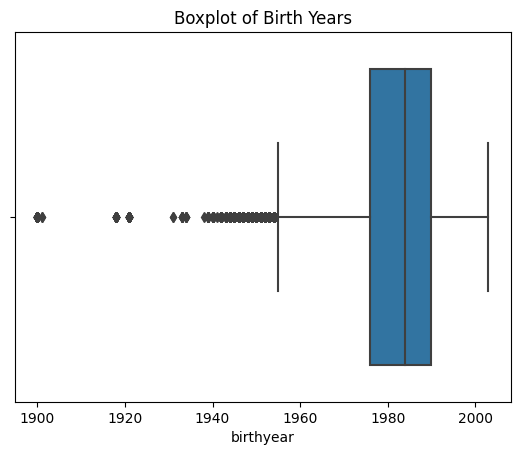

In [18]:
# Vamos visualizar a coluna 'birthyear' para entender esses valores discrepantes.
sns.boxplot(x=data_q1['birthyear'])
plt.title('Boxplot of Birth Years')
plt.show()


In [23]:
# Calcular o IQR
Q1 = data_q1['birthyear'].quantile(0.25)
Q3 = data_q1['birthyear'].quantile(0.75)
IQR = Q3 - Q1

# Identifique registros fora dos 'bigodes'.
outliers_birthyear = data_q1[(data_q1['birthyear'] < (Q1 - 1.5 * IQR)) | (data_q1['birthyear'] > (Q3 + 1.5 * IQR))]

# Mostrar os valores
print(outliers_birthyear)

# Vou considerar que esse valores discrepantes representam usuários idosos,
# Por isso vou mantê-los na análise.

         trip_id           start_time             end_time  bikeid  \
61      21742508  2019-01-01 01:26:27  2019-01-01 01:45:56    4105   
121     21742571  2019-01-01 02:51:20  2019-01-01 03:36:56     544   
144     21742596  2019-01-01 04:05:03  2019-01-01 04:09:30     218   
167     21742619  2019-01-01 06:42:13  2019-01-01 06:50:15    5782   
180     21742632  2019-01-01 07:31:18  2019-01-01 07:51:38    5711   
...          ...                  ...                  ...     ...   
364642  22177976  2019-03-31 18:35:19  2019-03-31 18:40:44    5499   
364798  22178141  2019-03-31 19:26:59  2019-03-31 19:35:07    5103   
364890  22178269  2019-03-31 20:10:07  2019-03-31 20:15:11    1826   
364902  22178281  2019-03-31 20:15:32  2019-03-31 20:39:39    6029   
364950  22178343  2019-03-31 20:58:22  2019-03-31 21:20:35    5710   

       tripduration  from_station_id               from_station_name  \
61          1,169.0               29        Noble St & Milwaukee Ave   
121         2,7

In [31]:
# Identificar valores únicos
unique_values_usertype = data_q1['usertype'].unique()
print(unique_values_usertype)

# Contar valores únicos
count_unique_values = data_q1['usertype'].value_counts()

# Exibir a contagem de valores únicos
print(count_unique_values)

# Para organização
print('*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-')

# Identificar valores únicos
unique_values_usertype = data_q1['gender'].unique()
print(unique_values_usertype)

# Contar valores únicos
count_unique_values = data_q1['gender'].value_counts()

# Exibir a contagem de valores únicos
print(count_unique_values)

['Subscriber' 'Customer']
usertype
Subscriber    341906
Customer       23163
Name: count, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
['Male' 'Female' 'unknow']
gender
Male      278440
Female     66918
unknow     19711
Name: count, dtype: int64


In [28]:
# Converte as colunas 'start_time' e 'end_time' para o formato datetime
data_q1['start_time'] = pd.to_datetime(data_q1['start_time'])
data_q1['end_time'] = pd.to_datetime(data_q1['end_time'])

# Crie a coluna 'ride_length'
data_q1['ride_length'] = data_q1['end_time'] - data_q1['start_time']

# Crie a coluna 'dia_da_semana' (1 para domingo, 2 para segunda-feira, etc.)
data_q1['day_of_week'] = data_q1['start_time'].dt.dayofweek + 1

# Exibir as primeiras linhas do DataFrame com as novas colunas
print(data_q1[['start_time', 'end_time', 'ride_length', 'day_of_week']].head())


           start_time            end_time     ride_length  day_of_week
0 2019-01-01 00:04:37 2019-01-01 00:11:07 0 days 00:06:30            2
1 2019-01-01 00:08:13 2019-01-01 00:15:34 0 days 00:07:21            2
2 2019-01-01 00:13:23 2019-01-01 00:27:12 0 days 00:13:49            2
3 2019-01-01 00:13:45 2019-01-01 00:43:28 0 days 00:29:43            2
4 2019-01-01 00:14:52 2019-01-01 00:20:56 0 days 00:06:04            2


In [33]:
# Confirmar se tudo funcionou!
data_q1.head()

trip_id          start_time            end_time  bikeid tripduration  \
0  21742443 2019-01-01 00:04:37 2019-01-01 00:11:07    2167        390.0   
1  21742444 2019-01-01 00:08:13 2019-01-01 00:15:34    4386        441.0   
2  21742445 2019-01-01 00:13:23 2019-01-01 00:27:12    1524        829.0   
3  21742446 2019-01-01 00:13:45 2019-01-01 00:43:28     252      1,783.0   
4  21742447 2019-01-01 00:14:52 2019-01-01 00:20:56    1170        364.0   

   from_station_id                    from_station_name  to_station_id  \
0              199               Wabash Ave & Grand Ave             84   
1               44               State St & Randolph St            624   
2               15                 Racine Ave & 18th St            644   
3              123       California Ave & Milwaukee Ave            176   
4              173  Mies van der Rohe Way & Chicago Ave             35   

                  to_station_name    usertype  gender  birthyear  \
0       Milwaukee Ave & Grand Ave  Subscriber    Male     1989.0   
1  Dearborn St & Van Buren St (*)  Subscriber  Female     1990.0   
2   Western Ave & Fillmore St (*)  Subscriber  Female     1994.0   
3               Clark St & Elm St  Subscriber    Male     1993.0   
4         Streeter Dr & Grand Ave  Subscriber    Male     1994.0   

      ride_length  day_of_week  
0 0 days 00:06:30            2  
1 0 days 00:07:21            2  
2 0 days 00:13:49            2  
3 0 days 00:29:43            2  
4 0 days 00:06:04            2

In [34]:
# # Identificar valores únicos
unique_values_usertype = data_q1['day_of_week'].unique()
print(unique_values_usertype)

# Contar valores únicos
count_unique_values = data_q1['day_of_week'].value_counts()

# Exibir a contagem de valores únicos
print(count_unique_values)

[2 3 4 5 6 7 1]
day_of_week
4    66903
5    63047
2    61005
3    60414
1    50399
6    35302
7    27999
Name: count, dtype: int64


Ok, parece que está limpo, agora vamos criar um algoritmo que faça isso com todas as planilhas.

In [45]:
# Renomear as colunas do Q2
old_to_new_mapping = {
    '01 - Rental Details Rental ID': 'trip_id',
    '01 - Rental Details Local Start Time': 'start_time',
    '01 - Rental Details Local End Time': 'end_time',
    '01 - Rental Details Bike ID': 'bikeid',
    '01 - Rental Details Duration In Seconds Uncapped': 'tripduration',
    '03 - Rental Start Station ID': 'from_station_id',
    '03 - Rental Start Station Name': 'from_station_name',
    '02 - Rental End Station ID': 'to_station_id',
    '02 - Rental End Station Name': 'to_station_name',
    'User Type': 'usertype',
    'Member Gender': 'gender',
    '05 - Member Details Member Birthday Year': 'birthyear'
}

# Inserir as colunas no Dataframe
data_q2.rename(columns=old_to_new_mapping, inplace=True)

# Confirmando
data_q2.head(3)

trip_id           start_time             end_time  bikeid tripduration  \
0  22178529  2019-04-01 00:02:22  2019-04-01 00:09:48    6251        446.0   
1  22178530  2019-04-01 00:03:02  2019-04-01 00:20:30    6226      1,048.0   
2  22178531  2019-04-01 00:11:07  2019-04-01 00:15:19    5649        252.0   

   from_station_id          from_station_name  to_station_id  \
0               81         Daley Center Plaza             56   
1              317        Wood St & Taylor St             59   
2              283  LaSalle St & Jackson Blvd            174   

             to_station_name    usertype  gender  birthyear  
0  Desplaines St & Kinzie St  Subscriber    Male     1975.0  
1  Wabash Ave & Roosevelt Rd  Subscriber  Female     1984.0  
2      Canal St & Madison St  Subscriber    Male     1990.0

In [46]:
# Transformação da planilha Q2
# Preencha valores nulos em 'gender' com 'unknow'
data_q2['gender'].fillna('unknow', inplace=True)

# Preencha valores nulos em 'ano de birthyear' com a média
data_q2['birthyear'].fillna(data_q2['birthyear'].mean(), inplace=True)

# Checar por duplicatas
data_q2.duplicated().sum()

# Converte as colunas 'start_time' e 'end_time' para o formato datetime
data_q2['start_time'] = pd.to_datetime(data_q2['start_time'])
data_q2['end_time'] = pd.to_datetime(data_q2['end_time'])

# Crie a coluna 'ride_length'
data_q2['ride_length'] = data_q2['end_time'] - data_q2['start_time']

# Crie a coluna 'dia_da_semana' (1 para domingo, 2 para segunda-feira, etc.)
data_q2['day_of_week'] = data_q2['start_time'].dt.dayofweek + 1

# Exibir as primeiras linhas do DataFrame com as novas colunas
data_q2.head()

trip_id          start_time            end_time  bikeid tripduration  \
0  22178529 2019-04-01 00:02:22 2019-04-01 00:09:48    6251        446.0   
1  22178530 2019-04-01 00:03:02 2019-04-01 00:20:30    6226      1,048.0   
2  22178531 2019-04-01 00:11:07 2019-04-01 00:15:19    5649        252.0   
3  22178532 2019-04-01 00:13:01 2019-04-01 00:18:58    4151        357.0   
4  22178533 2019-04-01 00:19:26 2019-04-01 00:36:13    3270      1,007.0   

   from_station_id          from_station_name  to_station_id  \
0               81         Daley Center Plaza             56   
1              317        Wood St & Taylor St             59   
2              283  LaSalle St & Jackson Blvd            174   
3               26   McClurg Ct & Illinois St            133   
4              202       Halsted St & 18th St            129   

             to_station_name    usertype  gender  birthyear     ride_length  \
0  Desplaines St & Kinzie St  Subscriber    Male     1975.0 0 days 00:07:26   
1  Wabash Ave & Roosevelt Rd  Subscriber  Female     1984.0 0 days 00:17:28   
2      Canal St & Madison St  Subscriber    Male     1990.0 0 days 00:04:12   
3   Kingsbury St & Kinzie St  Subscriber    Male     1993.0 0 days 00:05:57   
4  Blue Island Ave & 18th St  Subscriber    Male     1992.0 0 days 00:16:47   

   day_of_week  
0            1  
1            1  
2            1  
3            1  
4            1

In [43]:
# Transformação da planilha Q3
# Preencha valores nulos em 'gender' com 'unknow'
data_q3['gender'].fillna('unknow', inplace=True)

# Preencha valores nulos em 'ano de birthyear' com a média
data_q3['birthyear'].fillna(data_q3['birthyear'].mean(), inplace=True)

# Checar por duplicatas
data_q3.duplicated().sum()

# Converte as colunas 'start_time' e 'end_time' para o formato datetime
data_q3['start_time'] = pd.to_datetime(data_q3['start_time'])
data_q3['end_time'] = pd.to_datetime(data_q3['end_time'])

# Crie a coluna 'ride_length'
data_q3['ride_length'] = data_q3['end_time'] - data_q3['start_time']

# Crie a coluna 'dia_da_semana' (1 para domingo, 2 para segunda-feira, etc.)
data_q3['day_of_week'] = data_q3['start_time'].dt.dayofweek + 1

# Exibir as primeiras linhas do DataFrame com as novas colunas
data_q3.head()

trip_id          start_time            end_time  bikeid tripduration  \
0  23479388 2019-07-01 00:00:27 2019-07-01 00:20:41    3591      1,214.0   
1  23479389 2019-07-01 00:01:16 2019-07-01 00:18:44    5353      1,048.0   
2  23479390 2019-07-01 00:01:48 2019-07-01 00:27:42    6180      1,554.0   
3  23479391 2019-07-01 00:02:07 2019-07-01 00:27:10    5540      1,503.0   
4  23479392 2019-07-01 00:02:13 2019-07-01 00:22:26    6014      1,213.0   

   from_station_id              from_station_name  to_station_id  \
0              117       Wilton Ave & Belmont Ave            497   
1              381        Western Ave & Monroe St            203   
2              313  Lakeview Ave & Fullerton Pkwy            144   
3              313  Lakeview Ave & Fullerton Pkwy            144   
4              168         Michigan Ave & 14th St             62   

             to_station_name    usertype  gender    birthyear     ride_length  \
0  Kimball Ave & Belmont Ave  Subscriber    Male  1992.000000 0 days 00:20:14   
1      Western Ave & 21st St    Customer  unknow  1984.902996 0 days 00:17:28   
2  Larrabee St & Webster Ave    Customer  unknow  1984.902996 0 days 00:25:54   
3  Larrabee St & Webster Ave    Customer  unknow  1984.902996 0 days 00:25:03   
4            McCormick Place    Customer  unknow  1984.902996 0 days 00:20:13   

   day_of_week  
0            1  
1            1  
2            1  
3            1  
4            1

In [44]:
# Transformação da planilha Q4
# Preencha valores nulos em 'gender' com 'unknow'
data_q4['gender'].fillna('unknow', inplace=True)

# Preencha valores nulos em 'ano de birthyear' com a média
data_q4['birthyear'].fillna(data_q4['birthyear'].mean(), inplace=True)

# Checar por duplicatas
data_q4.duplicated().sum()

# Converte as colunas 'start_time' e 'end_time' para o formato datetime
data_q4['start_time'] = pd.to_datetime(data_q4['start_time'])
data_q4['end_time'] = pd.to_datetime(data_q4['end_time'])

# Crie a coluna 'ride_length'
data_q4['ride_length'] = data_q4['end_time'] - data_q4['start_time']

# Crie a coluna 'dia_da_semana' (1 para domingo, 2 para segunda-feira, etc.)
data_q4['day_of_week'] = data_q4['start_time'].dt.dayofweek + 1

# Exibir as primeiras linhas do DataFrame com as novas colunas
data_q4.head()

trip_id          start_time            end_time  bikeid tripduration  \
0  25223640 2019-10-01 00:01:39 2019-10-01 00:17:20    2215        940.0   
1  25223641 2019-10-01 00:02:16 2019-10-01 00:06:34    6328        258.0   
2  25223642 2019-10-01 00:04:32 2019-10-01 00:18:43    3003        850.0   
3  25223643 2019-10-01 00:04:32 2019-10-01 00:43:43    3275      2,350.0   
4  25223644 2019-10-01 00:04:34 2019-10-01 00:35:42    5294      1,867.0   

   from_station_id               from_station_name  to_station_id  \
0               20    Sheffield Ave & Kingsbury St            309   
1               19  Throop (Loomis) St & Taylor St            241   
2               84       Milwaukee Ave & Grand Ave            199   
3              313   Lakeview Ave & Fullerton Pkwy            290   
4              210       Ashland Ave & Division St            382   

               to_station_name    usertype  gender  birthyear     ride_length  \
0    Leavitt St & Armitage Ave  Subscriber    Male     1987.0 0 days 00:15:41   
1          Morgan St & Polk St  Subscriber    Male     1998.0 0 days 00:04:18   
2       Wabash Ave & Grand Ave  Subscriber  Female     1991.0 0 days 00:14:11   
3       Kedzie Ave & Palmer Ct  Subscriber    Male     1990.0 0 days 00:39:11   
4  Western Ave & Congress Pkwy  Subscriber    Male     1987.0 0 days 00:31:08   

   day_of_week  
0            2  
1            2  
2            2  
3            2  
4            2

Os dados estão limpos e prontos para análise. (づ｡◕‿‿◕｡)づ ヽ(^◇^*)/

In [47]:
# Salvar os dados limpos em novas planilhas
# Salvar data_q1 como CSV
data_q1.to_csv('data_q1_editado.csv', index=False)
# Salvar data_q2 como CSV
data_q2.to_csv('data_q2_editado.csv', index=False)
# Salvar data_q3 como CSV
data_q3.to_csv('data_q3_editado.csv', index=False)
# Salvar data_q4 como CSV
data_q4.to_csv('data_q4_editado.csv', index=False)